<h2>Neccessary Imports</h2>

In [1]:
# Necessary imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder                         # Sklearn import for data pre-processing
from sklearn.linear_model import LinearRegression                      # Sklearn import for Linear Regression. 
from sklearn.metrics import mean_squared_error, r2_score               # Sklearn import for algorithm metrics. 
from sklearn.model_selection import train_test_split, GridSearchCV     # Sklearn import for train, test split. 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

<h2>Loading Dataset into DataFrame</h2>

In [2]:
# Making use of pandas library to read the csv file. 
linear_regression_dataframe = pd.read_csv("Student_Performance.csv", delimiter=',')

<h2>Investigating Data within Data Frame</h2>

In [3]:
# Printing the first five rows of the dataset. 
linear_regression_dataframe.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# Printing the last five rows of the dataset. 
linear_regression_dataframe.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [5]:
# Checking the total nulls within each column of the data frame. 
linear_regression_dataframe.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
# Printing the amount of rows for each column. 
print(linear_regression_dataframe.count())

Hours Studied                       10000
Previous Scores                     10000
Extracurricular Activities          10000
Sleep Hours                         10000
Sample Question Papers Practiced    10000
Performance Index                   10000
dtype: int64


In [7]:
# Displaying the data type of each column. 
linear_regression_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


<h2>Data Pre-Processing</h2>

In [8]:
# Creating an instance of the LabelEncoder library. 
label_encoder = LabelEncoder()

# Used label encoder to transform categorical entries into numerical values. 
encoded_categorical_labels = label_encoder.fit_transform(linear_regression_dataframe['Extracurricular Activities'])

# Print the lable encoded vlaues.
print(encoded_categorical_labels)

[1 0 1 ... 1 1 0]


In [9]:
# Droping the categorical 'Extracurricular Activities' column.
linear_regression_dataframe.drop("Extracurricular Activities", axis=1, inplace=True)

# Appending the label encoded array to the 'Extracurricular Activities' column in the dataset. 
linear_regression_dataframe['Extracurricular Activities'] = encoded_categorical_labels

# Displaying the first five rows of the 
linear_regression_dataframe.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


In [10]:
# Displaying a simple correlation matrix
linear_regression_dataframe.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730,0.003873
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189,0.008369
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106,-0.023284
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268,0.013103
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000,0.024525
Extracurricular Activities,0.003873,0.008369,-0.023284,0.013103,0.024525,1.000000


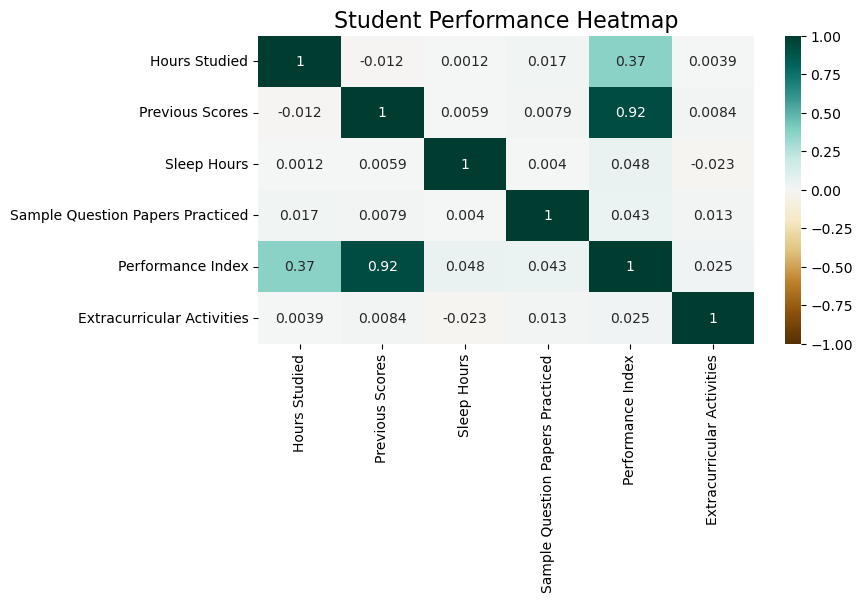

In [11]:
# Creating a heatmap figure.
# Setting the size of the figure.
plt.figure(figsize=(8, 4))

# Intializing a headmap variable, passing the correlated linear regression data frame. 
# Setting the minimum and maximum ranges of the heatmap.
# Setting annot to 'True' to make the correlation values visable. 
# Setting the heatmap style to 'BrBG'.
dataframe_heatmap = sns.heatmap(linear_regression_dataframe.corr(), 
                                vmin=-1, vmax=1, 
                                annot=True, cmap='BrBG')

# Adding a title to the heatmap figure. 
plt.title('Student Performance Heatmap', fontdict={'fontsize':16})

# Displaying the heatmap figure. 
plt.show()

<h2>Simple Linear Regression</h2>

In [12]:
# Defining the dependent variable (y_target_variable) and the 
# independent variable (X_feature)
y_target_variable = linear_regression_dataframe['Performance Index']
X_feature = linear_regression_dataframe[['Previous Scores']]

# Using train_test_split to split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target_variable, test_size=0.2, random_state=42)

# Printing the training and test set shapes. 
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 8000
Testing set size: 2000


In [13]:
# Intitalizing the Linear Regression model.
linear_regression_model = LinearRegression()

# Train the linear regression model on the data. 
linear_regression_model.fit(X_train, y_train)

# Print the intercept and coefficient
print(f"Intercept: {linear_regression_model.intercept_}")
print(f"Coefficient: {linear_regression_model.coef_}")

Intercept: -15.104435146091397
Coefficient: [1.0127272]


In [14]:
# Predict the Performance Index for the testing test. 
y_linear_regression_pred = linear_regression_model.predict(X_test)

# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_linear_regression_pred})
print(predictions.head())

      Actual  Predicted
6252    51.0  54.773742
4684    20.0  31.481016
1731    46.0  41.608288
4742    28.0  27.430107
4521    41.0  38.570107


<h2>Simple Linear Regression (Alternative x-feature)</h2>

In [15]:
# Defining the dependent variable (y_target_variable) and the 
# independent variable (X_feature)
y_target_variable = linear_regression_dataframe['Performance Index']
x_feature_hrs_studied = linear_regression_dataframe[['Hours Studied']]

# Using train_test_split to split the data into training and test sets.
second_X_train, second_X_test, second_y_train, second_y_test = train_test_split(x_feature_hrs_studied, y_target_variable, test_size=0.2, random_state=42)

# Printing the training and test set shapes. 
print(f"Training set size: {second_X_train.shape[0]}")
print(f"Testing set size: {second_X_test.shape[0]}")

Training set size: 8000
Testing set size: 2000


In [16]:
# Intitalizing the Linear Regression model.
second_linear_regression_model = LinearRegression()

# Train the linear regression model on the data. 
second_linear_regression_model.fit(second_X_train, second_y_train)

# Print the intercept and coefficient
print(f"Intercept: {second_linear_regression_model.intercept_}")
print(f"Coefficient: {second_linear_regression_model.coef_}")

Intercept: 41.436634826535794
Coefficient: [2.78430044]


In [17]:
# Predict the Performance Index for the testing test. 
second_y_linear_regression_pred = second_linear_regression_model.predict(second_X_test)

# Display the first few predictions alongside the actual values
second_predictions = pd.DataFrame({'Actual': second_y_test, 'Predicted': second_y_linear_regression_pred})
print(second_predictions.head())

      Actual  Predicted
6252    51.0  55.358137
4684    20.0  47.005236
1731    46.0  60.926738
4742    28.0  58.142437
4521    41.0  60.926738


<h2>Data Visualization</h2>

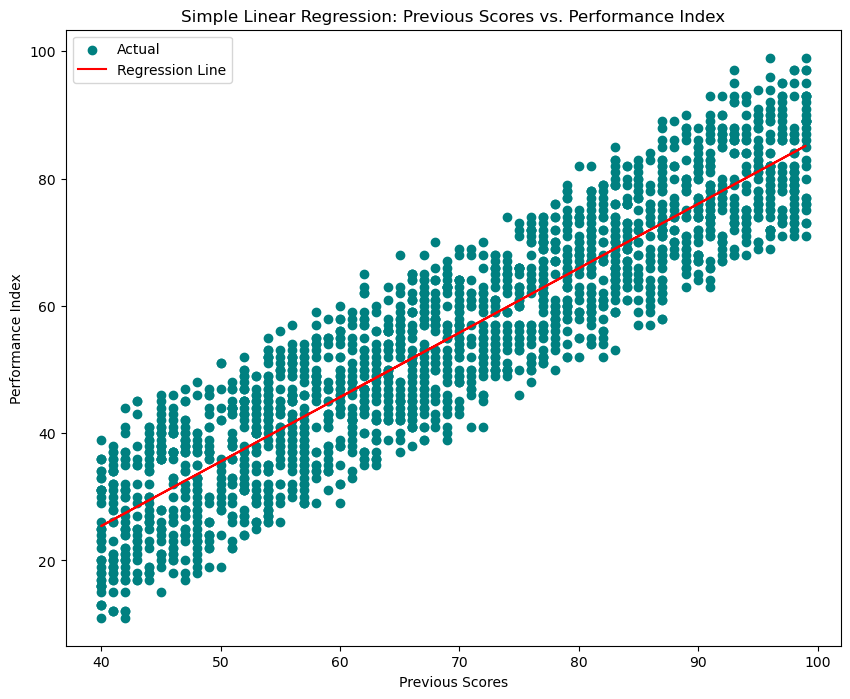

In [18]:
# Setting the size of the figure.
plt.figure(figsize=(10, 8))

# Plot the actual data points
plt.scatter(X_test, y_test, color='teal', label='Actual')

# Plot the regression line
plt.plot(X_test, y_linear_regression_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Simple Linear Regression: Previous Scores vs. Performance Index')
plt.legend()
plt.show()

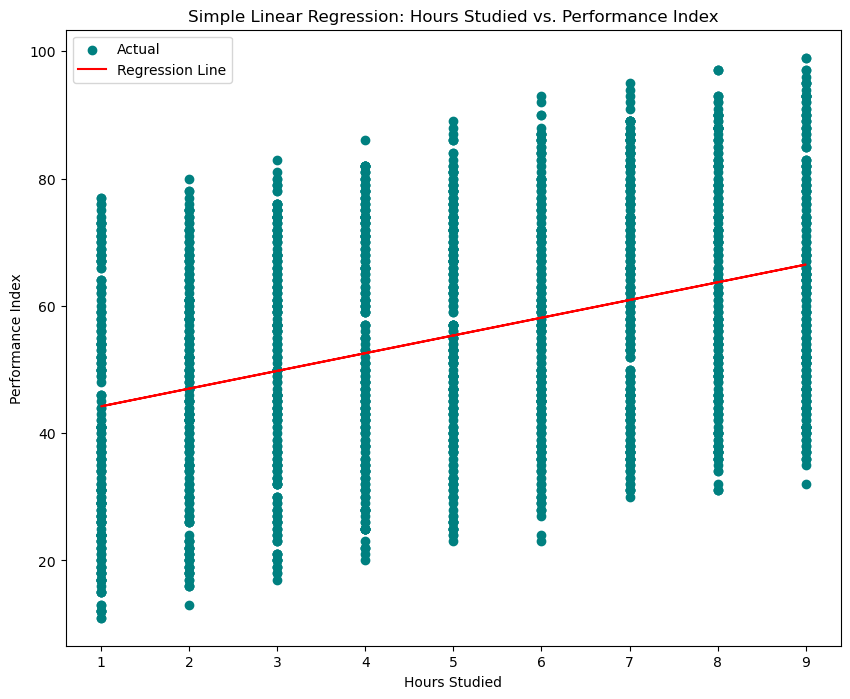

In [19]:
# Setting the size of the figure.
plt.figure(figsize=(10, 8))

# Plot the actual data points
plt.scatter(second_X_test, second_y_test, color='teal', label='Actual')

# Plot the regression line
plt.plot(second_X_test, second_y_linear_regression_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Simple Linear Regression: Hours Studied vs. Performance Index')
plt.legend()
plt.show()

<h2>Model Scoring Metrics</h2>

In [20]:
# Calculate Mean Squared Error (MSE)
linear_regression_mse = mean_squared_error(y_test, y_linear_regression_pred)
print(f"Mean Squared Error: {linear_regression_mse}")

# Calculate R-squared score
linear_regression_r2 = r2_score(y_test, y_linear_regression_pred)
print(f"R-squared score: {linear_regression_r2}")

Mean Squared Error: 58.949059849219644
R-squared score: 0.8409297694265205


In [21]:
# Calculate Mean Squared Error (MSE)
second_linear_regression_mse = mean_squared_error(second_y_test, second_y_linear_regression_pred)
print(f"Mean Squared Error: {second_linear_regression_mse}")

# Calculate R-squared score
second_linear_regression_r2 = r2_score(second_y_test, second_y_linear_regression_pred)
print(f"R-squared score: {second_linear_regression_r2}")

Mean Squared Error: 321.8145383172104
R-squared score: 0.13160425385996788


<h2>Making use Of a Pipeline and Parameter grid <h2>

In [22]:
# Defining a pipeline for linear regression algorithm. 

linear_regression_pipeline = Pipeline([
    ('scalar', StandardScaler()),
    ('regressor', LinearRegression())])